In [40]:
import matplotlib as mlt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import random
import time
sns.set()

In [82]:
#importing our netflix viewing history csv
df1 = pd.read_csv("C:/Users/trive/Downloads/NetflixViewingHistory.csv")
df1['Title'] = df1['Title'].astype(str)
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%y', errors='coerce')
df1 = df1[df1['Date'].dt.year == 2023]
df1['show_title'] = [s.partition(':')[0] for s in df1['Title']]
my_titles = list(df1['show_title'])

In [83]:
df2 = pd.read_csv("C:/Users/trive/Downloads/archive (3)/netflix_titles.csv")
df = pd.merge(df1, df2, left_on='show_title', right_on='title', how='inner') #merged df
movies_df = df[df['type'] == 'Movie']
movies_df = movies_df.drop_duplicates(subset='show_title') #cleaning movie dataset
shows_df = df[df['type'] == 'TV Show']

In [84]:
#top shows 
top_show = shows_df['show_title'].value_counts().head(5)

In [85]:
#top rewatches
movies_dfx = df[df['type'] == 'Movie'] #need duplicates here so calling back original list
movies_count=movies_dfx['show_title'].value_counts().head(5)
top_rewatch = movies_count[movies_count >1].head(5)

C:\Users\trive\AppData\Local\Temp\ipykernel_17028\2015628193.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


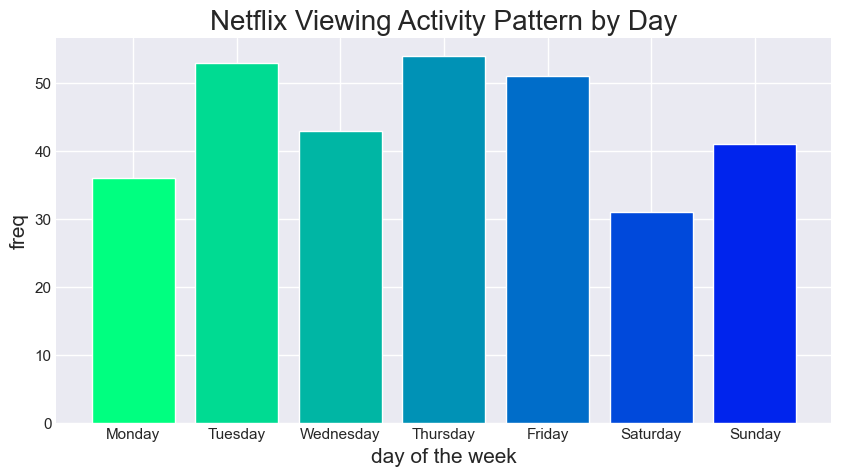

In [86]:
from datetime import datetime
df['date'] = pd.to_datetime(df['Date'])
df['day'] = df['date'].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=cats, ordered=True)
by_day = df.sort_values('day')['day'].value_counts().sort_index()
plt.style.use('seaborn-darkgrid')
N = len(by_day)
x = np.arange(N)
colors = plt.get_cmap('winter').reversed()
plt.figure(figsize=(10,5))
plt.bar(by_day.index, by_day.values, color=colors(x/N))
plt.title("Netflix Viewing Activity Pattern by Day", fontsize=20)
plt.xlabel("day of the week", fontsize=15)
plt.ylabel("freq", fontsize=15)
plt.savefig("freq by day.png", dpi=300, bbox_inches='tight')
plt.show()

In [87]:
#top directors
movies_df = df[df['type'] == 'Movie']
movies_df = movies_df.drop_duplicates(subset='show_title')
director_counts = movies_df['director'].value_counts()
top_directors = director_counts[director_counts > 1].head(5)

In [88]:
#top actors
dfx = df.drop_duplicates(subset='show_title')
actor_counts = dfx['cast'].str.split(', ', expand=True).stack().value_counts()
top_actors = actor_counts.head(5)

In [89]:
#you watched _ by your favorite actor
def any_actor_in_top(row):
     if isinstance(row['cast'], str):  # Check if cast is a string
        actors = row['cast'].split(', ')
        return any(actor in top_actors.head(1).index for actor in actors)
     return False  # Return False for non-string or NaN values

filtered_df = dfx[dfx.apply(any_actor_in_top, axis=1)]

In [90]:
#top genres
genre_counts = df['listed_in'].str.split(', ', expand=True).stack().value_counts()
top_genre = genre_counts[genre_counts >1].head(5)
genre_names = top_genre.index.tolist()

In [91]:
#era
decades = range(1900, 2031, 10)
movies_df['decade'] = pd.cut(movies_df['release_year'], bins=decades, labels=decades[:-1])
decade_counts = movies_df['decade'].value_counts().sort_index()
top_decade = decade_counts.idxmax()

In [92]:
#decade roast
top_decade_movies = movies_df[movies_df['decade'] == top_decade]
roast_decade = top_decade_movies['show_title'].head(3).tolist()
if len(roast_decade) == 1:
    formatted_string = roast_decade[0]
elif len(roast_decade) == 2:
    formatted_string = ' and '.join(roast_decade)
else:
    formatted_string = ', '.join(roast_decade[:-1]) + ', and ' + roast_decade[-1]

In [93]:
#most watched day
Most_Watched_Day = df['Date'].value_counts().head(1).index[0]
filtered_df = df[df['Date'] == Most_Watched_Day]
episodes_watched = 0
movie_count=0
movies_watched = []
for index, row in filtered_df.iterrows():
    if row['type'] == 'TV Show':
        episodes_watched += 1
        if row['show_title'] not in movies_watched:
            movies_watched.append(row['show_title'])
    elif row['type'] == 'Movie':
        movie_count += 1
        if row['show_title'] not in movies_watched:
            movies_watched.append(row['show_title'])

In [94]:
#highest rated movie on IMDb
imdb= pd.read_csv("C:/Users/trive/Downloads/archive (4)/tmdb_5000_movies.csv")
tmdb = pd.merge(df1, imdb, left_on='show_title', right_on='original_title', how='inner') #merged df
tmdb = tmdb.sort_values(by='vote_average', ascending=False)
top = tmdb.head(1).squeeze()

In [95]:
#highest and lowest score on rotten tomatoes
Rotten_Tomatoes= pd.read_csv('C:/Users/trive/Downloads/archive (6)/rotten_tomatoes_movies.csv')
Rotten_Tomatoes.dropna(inplace=True)
final = pd.merge(df1, Rotten_Tomatoes, left_on='show_title', right_on='movie_title', how='inner') #merged df
final = final.sort_values(by='audience_rating', ascending=False)
top_m = final.head(1).squeeze()
low_m = final.tail(1).squeeze()

In [96]:
#best and worst rated show
IMDB = pd.read_csv("C:/Users/trive/Downloads/19cbf7e3-29ab-409b-97e4-65e65f0b4a65.csv")
final = pd.merge(df1, IMDB, left_on='show_title', right_on='Title', how='inner') #merged df
final = final.sort_values(by='IMDb Rating', ascending=False)
top_s = final.head(1).squeeze()
low_s = final.tail(1).squeeze()

In [97]:
#getting show and actor
showmax = top_show.idxmax()
actormax = top_actors.idxmax()
directormax = top_directors.idxmax()
genremax = top_genre.idxmax()
showmax

'Friends'

In [130]:
top_10=my_titles = ["Stranger Things","The Crown","Money Heist","Breaking Bad","Narcos","The Witcher","Black Mirror","The Queen's Gambit","Ozark","Bridgerton","The Umbrella Academy","Mindhunter","Dark","Unorthodox","House of Cards","Orange Is the New Black","The Haunting of Hill House","BoJack Horseman","The Mandalorian","Tiger King: Murder, Mayhem and Madness"]
roasts = {"Stranger Things": 'still-trying-to-communicate-through-walkie-talkies bad.',
"The Crown": 'wishing-you-had-a-crown-to-dramatically-throw bad.',
"Money Heist": 'thinking-youre-in-a-heist-every-time-you-use-the-ATM bad.',
"Breaking Bad": 'cooking-up-drama-like-youre-Walter-White bad.',
"Narcos": 'ordering-takeout-like-youre-Pablo-Escobar bad.',
"The Witcher": 'casting-spells-trying-to-find-your-TV-remote bad.',
"Black Mirror": 'questioning-reality-like-youre-in-a-Black-Mirror-episode bad.',
"The Queen's Gambit": 'plotting-your-next-move-like-Beth-Harmon bad',
"Ozark": 'laundering-dishes-after-watching-Ozark bad.',
"Bridgerton": 'rehearsing-your-fancy-English-accent-like-youre-in-Bridgerton bad.',
"The Umbrella Academy": 'forming-a-family-band-like-The-Umbrella-Academy bad.',
"Mindhunter": 'profiling-your-neighborhood-like-youre-in-Mindhunter bad.',
"Dark": 'time-traveling-to-find-the-remote-like-youre-in-Dark bad.',
"Unorthodox": 'breaking-tradition-like-Esther-in-Unorthodox bad.',
"House of Cards": 'plotting-your-political-strategy-like-Frank-Underwood bad.',
"Orange Is the New Black": 'dressing-in-orange-like-youre-in-OITNB bad.',
"The Haunting of Hill House": 'turning-on-all-the-lights-after-watching-Haunting-of-Hill-House bad.',
"BoJack Horseman": 'reflecting-on-life-like-BoJack-Horseman bad.',
"The Mandalorian": 'searching-for-Baby-Yoda-merch-like-youre-The-Mandalorian bad.',
"Tiger King": 'collecting-tiger-king-memorabilia-like-youre-Joe-Exotic bad.',
"The Mother": 'thinking-Jennifer-Lopez-can-do-no-wrong bad.',
"Luther: The Fallen Sun": 'believing-Idris-Elba-actually-has-superpowers bad.',
"Extraction 2": 'trying-to-be-Chris-Hemsworth-but-failing-miserably bad.',
"You People": 'laughing-at-jokes-that-aren’t-funny bad.',
"Murder Mystery 2": 'solving-mysteries-like-Adam-Sandler bad.',
"Your Place or Mine": 'thinking-long-distance-relationships-actually-work bad.',
"Glass Onion": 'feeling-like-a-detective-but-really-just-confused bad.',
"The Pale Blue Eye": 'pretending-you-understand-Edgar-Allan-Poe bad.',
"AKA": 'living-your-spy-fantasy-through-Netflix bad.',
"Minions: The Rise of Gru": 'speaking-minionese-to-your-friends bad.'}
top_10_movies_2023 = [
    "The Mother",
    "Luther: The Fallen Sun",
    "Extraction 2",
    "You People",
    "Murder Mystery 2",
    "Your Place or Mine",
    "Glass Onion: A Knives Out Mystery",
    "The Pale Blue Eye",
    "AKA",
    "Minions: The Rise of Gru"
]
def tagline():
    L =[]
    s= ""
    for x in top_10 or x in top_10_movies_2023 :
        if x in df1['show_title'].values:
            L.append(x)
    for z in L:
        s+=z
        s+= ", "
        
    print(f"Thank your obsessions {s}")
    print(f"Based on your binge-watching habits, I can also tell you it was:")
    for y in L:
     
        print(f"> {roasts.get(y)}")
    print("Here's what else is going on in your aural trash fire:")

In [129]:
def roast_movie_taste():
    print("So, I see you've been consuming a lot of Netflix lately...")
    time.sleep(2)
    print("Let's take a look at your Netflix wrapped, shall we?")
    time.sleep(4)

    print(f"Oh wow, you've been indulging in {top_s['show_title']}?")
    time.sleep(2)
    print(f"Are you just binging {showmax} because you're too lazy to find something new?")
    time.sleep(2)
    print(f"And you managed to sit through {low_s['show_title']}? That's dedication!")
    time.sleep(4)

    print("Now, let's analyze the actors you seem to admire (in movies/shows)...")
    time.sleep(4)
    print(f"You're a fan of {actormax}? That's... interesting.")
    time.sleep(2)
    print(f"Do you really think {top_actors.head(2).index[1]} is a top-tier actor?")
    time.sleep(2)
    print("Alrighty then...")
    time.sleep(2)
    print(f"And how did you find {low_m['show_title']}?")
    time.sleep(4)
    answer = input("Good/I just watched it for the jokes:")
    if answer == "Good":
        print(f"Interesting, it's rated quite low by the audience... around {int(low_m['audience_rating'])}%")
    else:
        print(f"Fair enough.")
    time.sleep(2)
    most_watched_day = by_day.idxmax()
    if most_watched_day not in ['Friday', 'Saturday', 'Sunday']:
        print(f"Seriously? You watch Netflix most on {most_watched_day}? Weekdays are for productivity, you know!")
    else:
        print(f"Seriously? You watch Netflix most on {most_watched_day}? So you just sit around and rot in bed all day...you should try going to the park for once")
    time.sleep(2)
    if directormax == 'Unknown':
        print("Oh, you don't have any favorite directors? That's... intriguing.")
        time.sleep(2)
        print("Ever wondered who directed those movies you're watching?")
        time.sleep(4)
    else:
        print(f"You're a fan of {directormax}? That's cool, I guess.")
        time.sleep(2)
        print(f"So {top_directors.head(2).index[1]} is your favorite director? How very... predictable.")
        time.sleep(2)
        print(f"And did you survive {top_directors.head(3).index[1]}'s latest epic? It was practically a marathon!")
        time.sleep(4)

    print(f"Oh, you enjoy {genremax} movies and shows? That's so... trendy.")
    time.sleep(2)
    for i in range(0, 6):
        if top_genre[i] == "TV Comedies":
            print(f"Comedies are your favorite? How original. You must have such a unique sense of humor.")
            time.sleep(4)
        elif top_genre[i] == "Romantic TV Shows":    
            print(f"Romantic shows, huh? Aw, you must be such a hopeless romantic.")
            time.sleep(4)
        elif top_genre[i] == "TV Thrillers":
            print(f"Thrillers, really? Trying to add some excitement to your life, are we?")
            time.sleep(4)
        else:
            break

    print(f"It seems you've been stuck on movies from {top_decade}. That's so... {top_decade}.")
    time.sleep(2)
    if top_decade < 2020:
        print(f"{top_decade} was a great era for movies, but are you still watching {formatted_string}? Seriously?")
        print("1. Yes")
        print("2. No")
        print("3. Maybe")
        time.sleep(2)

        response = int(input("Enter the number of your response: "))

        if response == 1:
            print("Wow, you must really enjoy torturing yourself. Hang in there, it might get better... someday.")
            time.sleep(4)
        elif response == 2:
            print("Finally some self-awareness! You know your taste is... evolving, right?")
            time.sleep(4)
        elif response == 3:
            print("Maybe? That's just a fancy way of saying you have no clue what you're doing with your life.")
            time.sleep(4)
        else:
            print("Invalid response. You must be as confused as your viewing history.")
            time.sleep(4)

        print("Well, that's all the time we have for today's roast session.")
        time.sleep(2)
        print("Let's summarize your taste in movies and shows...")
        print(tagline())
        if top_rewatch.idxmax() != 'Unknown':
            print(f"Based on your viewing history, it's clear you have a soft spot for {top_rewatch.idxmax()}.")
            time.sleep(2)
        print(f"Your preference for {genre_names[0]} and {genre_names[1]} is... intriguing. We're not judging you, but maybe you should.")
        time.sleep(2)
        print(f"And your fascination with movies from {top_decade} is... quite nostalgic. Are you stuck in the past or just ahead of your time?")
        time.sleep(2)

        print("In conclusion, your taste in movies and shows is... well, it's definitely something. Keep on watching, I guess?")
        time.sleep(2)
        print("Thanks for playing along, and remember to check your Netflix wrapped for more surprising insights!")

roast_movie_taste()


So, I see you've been consuming a lot of Netflix lately...
Let's take a look at your Netflix wrapped, shall we?
Oh wow, you've been indulging in Peaky Blinders?
Are you just binging Friends because you're too lazy to find something new?
And you managed to sit through Unbreakable Kimmy Schmidt? That's dedication!
Now, let's analyze the actors you seem to admire (in movies/shows)...
You're a fan of Adam Sandler? That's... interesting.
Do you really think Raghuvir Yadav is a top-tier actor?
Alrighty then...
And how did you find The Circle?
Good/I just watched it for the jokes:Good
Interesting, it's rated quite low by the audience... around 21%
Seriously? You watch Netflix most on Thursday? Weekdays are for productivity, you know!
You're a fan of Dennis Dugan? That's cool, I guess.
So Zoya Akhtar is your favorite director? How very... predictable.
And did you survive Zoya Akhtar's latest epic? It was practically a marathon!
Oh, you enjoy TV Comedies movies and shows? That's so... trendy.
I